In [30]:
# Temprorary fix for https://github.com/IRkernel/IRkernel/issues/145 https://github.com/jupyter/nbviewer/issues/453
options(jupyter.plot_mimetypes = 'image/png')

# Feature value-concept type box plots

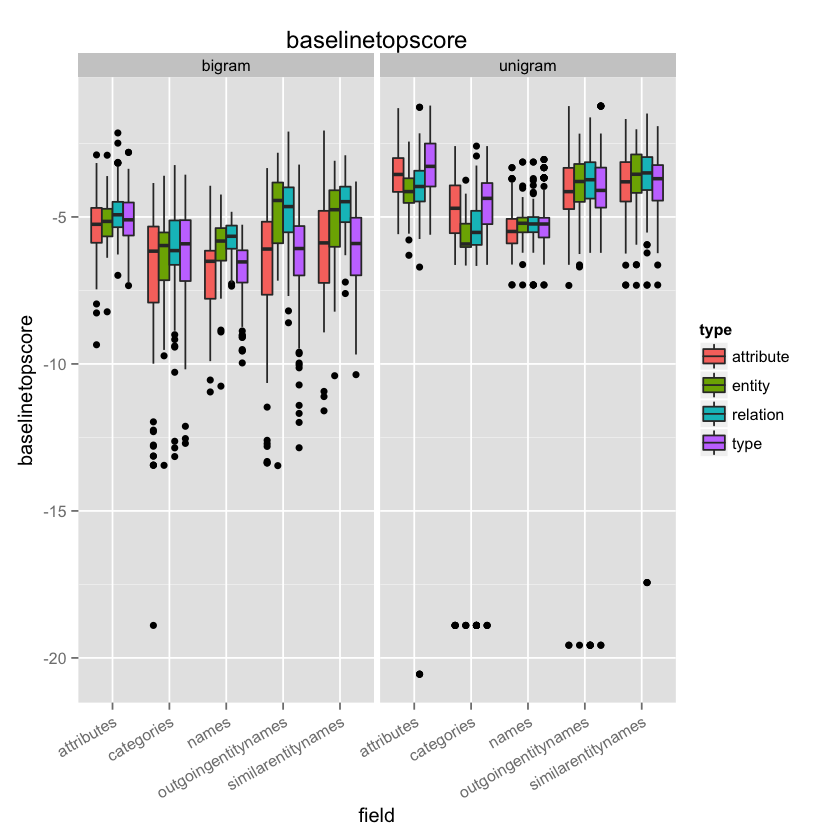

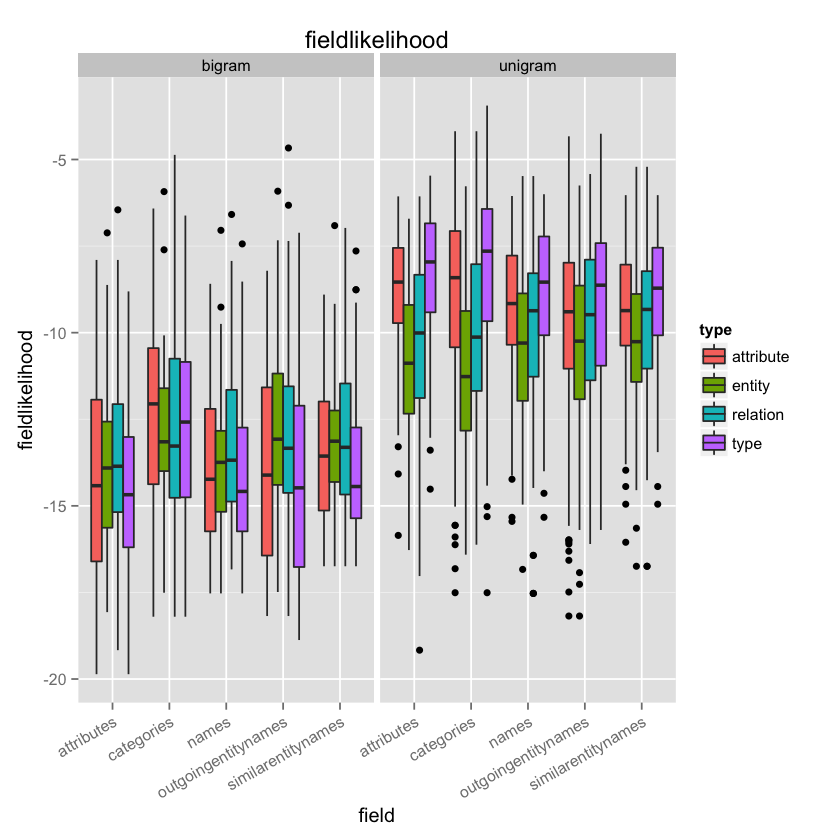

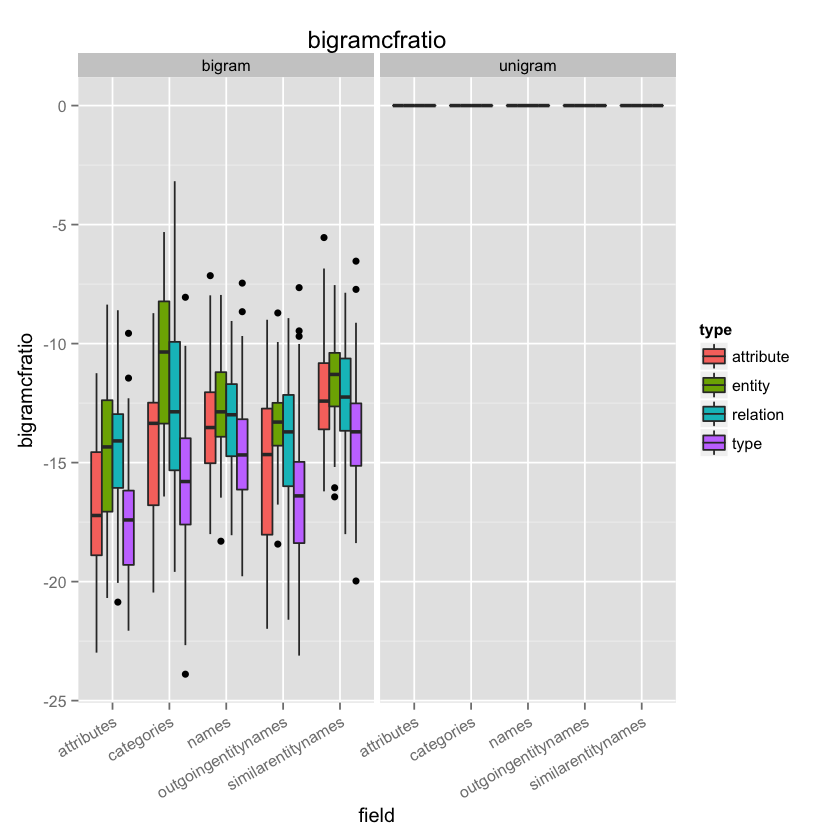

In [31]:
library(tidyr)
library(dplyr)
library(ggplot2)
runtime.features <- read.table("..//output//features_values.tsv", header = TRUE, sep = "\t")
is.na(runtime.features) <- sapply(runtime.features, is.infinite)
runtime.features$id <- rep(1:(nrow(runtime.features)/3), each=3)
runtime.features.wide <- spread(runtime.features, featurename, featurevalue)
concept.types <- read.table("..//data//sigir2013-dbpedia//concept-types.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "type", "text"))
concept.types$concept.id <- 1:(nrow(concept.types))
runtime.features.wide$concept.id <- rep(1:(nrow(runtime.features.wide)/5), each=5)
merged <- merge(runtime.features.wide, concept.types, by = c("concept.id", "qid", "gram"))
filtered <- filter(merged, type != "", type != "unsure", type != "none")
features <- c("baselinetopscore", "fieldlikelihood", "bigramcfratio")
for (feature in features) {
  print(ggplot(na.omit(filtered[,c(feature, "field", "type", "ngramtype")]), aes_string(y = feature, x = "field", fill = "type")) +
        geom_boxplot() + facet_wrap(~ngramtype) + theme(axis.text.x=element_text(angle=30,hjust=1)) +
        ggtitle(feature))
}

# Contingency tables for binary features
These features doesn't depend on field.

## NNP feature

In [32]:
featue.values <- read.table("..//src//main//resources//file-based-features//nnp.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(featue.values$value, concept.types$type)) %>% select(-none, -unsure) %>% rename(TOTAL=V1)

,TOTAL,attribute,entity,relation,type
0,987,352,14,30,366
1,209,76,73,163,26


## NNS feature

In [33]:
featue.values <- read.table("..//src//main//resources//file-based-features//nns.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(featue.values$value, concept.types$type)) %>% select(-none, -unsure) %>% rename(TOTAL=V1)

,TOTAL,attribute,entity,relation,type
0,926,401,86,188,192
1,270,27,1,5,200


## NP-exact feature

In [34]:
featue.values <- read.table("..//src//main//resources//file-based-features//np-exact.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(featue.values$value, concept.types$type)) %>% select(-none, -unsure) %>% rename(TOTAL=V1)

,TOTAL,attribute,entity,relation,type
0,1089,418,74,175,354
1,107,10,13,18,38


## NP-part feature

In [35]:
featue.values <- read.table("..//src//main//resources//file-based-features//np-part.tsv", sep = "\t", quote = "", col.names = c("qid", "gram", "value", "text"))
as.data.frame.matrix(table(featue.values$value, concept.types$type)) %>% select(-none, -unsure) %>% rename(TOTAL=V1)

,TOTAL,attribute,entity,relation,type
0,950,359,60,142,293
1,246,69,27,51,99
